## Descriptive Analysis

In [32]:
import pandas as pd

In [33]:
# # df_yahoo = pd.read_csv("")
# df_analyst = pd.read_csv("../data/raw/raw_analyst_ratings.csv")
import dask.dataframe as dd
df_analyst = dd.read_csv("../data/raw/raw_analyst_ratings.csv")

In [34]:
df_analyst.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [35]:
df_analyst.tail()

,Unnamed: 0,headline,url,publisher,date,stock
280296,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
280297,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
280298,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
280299,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
280300,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


#### No of characters in news headlines

<Axes: >

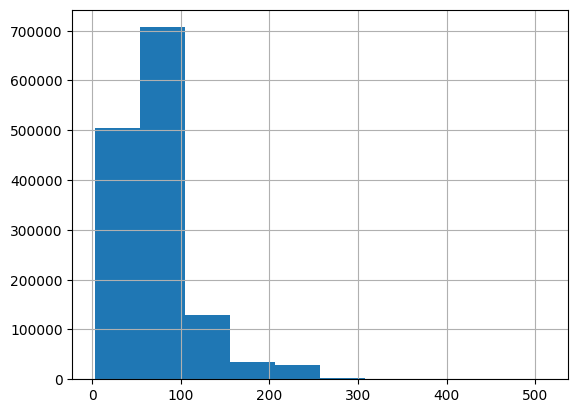

In [37]:
# Dask dataframe does not support hist
# hence the len will be computed first 
# and converted to pandas, then after it 
# will be plotted
headline_length = df_analyst["headline"].str.len().compute()
headline_length.hist()

#### No of words in news headlines

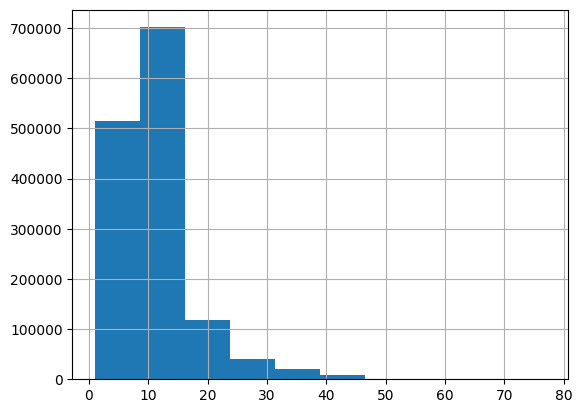

In [36]:
def plot_word_number_histogram(text):
    # Convert dask dataframe to pandas dataframe
    text_df = text.compute()
    headlines_no_of_words = text_df.str.split().\
        map(lambda x: len(x))

    headlines_no_of_words.hist()
    
plot_word_number_histogram(df_analyst["headline"])

#### Average word length in each sentence

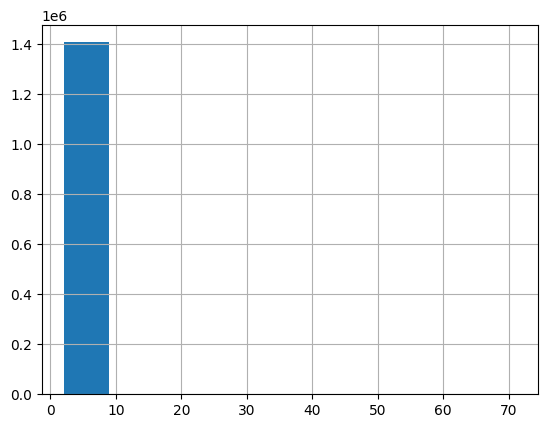

In [38]:
import numpy as np

def average_word_length_in_each_sentence(text):
   # Convert dask dataframe to pandas dataframe
   text_df = text.compute()
   text_df.str.split().\
      apply(lambda x : [len(i) for i in x]).\
      map(lambda x: np.mean(x)).hist()

average_word_length_in_each_sentence(df_analyst["headline"])

#### No of articles per publisher

In [39]:
grouped_df = df_analyst.groupby(["publisher"]).count()

In [40]:
grouped_df.head(100)

,Unnamed: 0,headline,url,date,stock
publisher,,,,,
AARP,7,7,7,7,7
ABNNewswire,13,13,13,13,13
Aakin,5,5,5,5,5
Aaron Jackson.Ed,16,16,16,16,16
Aaron Levitt,295,295,295,295,295
...,...,...,...,...,...
Bob Lang,18,18,18,18,18
Bob White,59,59,59,59,59
BobStewart,1,1,1,1,1


In [6]:
def descriptive_analysis():
    print("Printing data info")
    df_analyst.info()
    print("Prining data description")
    df_analyst.select_dtypes(include='number').describe()

descriptive_analysis()

Printing data info
<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 6 entries, Unnamed: 0 to stock
dtypes: int64(1), string(5)Prining data description
